
# <center><font size="6"> <b>Projet du cours de *Techniques avancées d'apprentissage*</b></font>

<center>Article étudié:</center>

##  <center>Vikas C.Raykar et al. "Learning From Crowds" (2010)

Ce *notebook* a été réalisé par **Oscar BOUVIER** et **Thomas JACQUOT**. Son objectif est d'implémenter les méthodes décrites dans l'article dans le cadre de la classification binaire et de la régression.  

# Téléchargement des données et chargement des *packages* nécessaires

## Récupération des données de classification

In [33]:
! wget https://gitlab.com/JACQUOT_THOMAS/learning_from_crowds/-/raw/master/data/breast_cancer.csv

--2021-05-10 12:39:32--  https://gitlab.com/JACQUOT_THOMAS/learning_from_crowds/-/raw/master/data/breast_cancer.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘breast_cancer.csv.1’

breast_cancer.csv.1     [ <=>                ]  58.18K  --.-KB/s    in 0.03s   

2021-05-10 12:39:32 (2.22 MB/s) - ‘breast_cancer.csv.1’ saved [59576]



## Imports de *packages*

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import norm

## Lecture des données 

In [35]:
df_cancer = pd.read_csv('breast_cancer.csv', sep=';')

## Fonctions utiles

In [36]:
def plot_confusion_matrix(y_true, y_pred): 
  """
  Plot a confusion matrix 
  :parameter
    :param y_true: array (n_samples,)
    :param y_pred: array (n_samples,)
  """
  cm = confusion_matrix(y_true, y_pred)
  classes = np.unique(y_true)
  fig, ax = plt.subplots()
  sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
              cbar=False)
  ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
  plt.yticks(rotation=0)
  plt.xticks(rotation=0)
  plt.show()

In [37]:
def get_classification_scores(y_true, y_pred, y_pred_prob): 
  """
  Display Aucuracy, Auc and classification report 
  :parameter
    :param y_true: array (n_samples,)
    :param y_pred: array (n_samples,)
  """
  accuracy_val = accuracy_score(y_true, y_pred)
  auc_val = roc_auc_score(y_true, y_pred_prob)
  print("Accuracy:",  round(accuracy_val,4))
  print("Auc:", round(auc_val,4))
  print("Details:")
  print(classification_report(y_true, y_pred))

# Problème de classification binaire 

## Exploration des données 

In [38]:
df_cancer.head(10)

Radius  Texture  Perimeter    Area  ...  label2  label3  label4  label5
0   17.99    10.38     122.80  1001.0  ...     1.0     0.0     0.0     0.0
1   20.57    17.77     132.90  1326.0  ...     0.0     1.0     0.0     0.0
2   19.69    21.25     130.00  1203.0  ...     1.0     1.0     0.0     1.0
3   11.42    20.38      77.58   386.1  ...     1.0     1.0     1.0     0.0
4   20.29    14.34     135.10  1297.0  ...     1.0     1.0     0.0     0.0
5   12.45    15.70      82.57   477.1  ...     1.0     1.0     1.0     1.0
6   18.25    19.98     119.60  1040.0  ...     0.0     1.0     0.0     1.0
7   13.71    20.83      90.20   577.9  ...     1.0     1.0     1.0     1.0
8   13.00    21.82      87.50   519.8  ...     1.0     1.0     1.0     1.0
9   12.46    24.04      83.97   475.9  ...     1.0     0.0     1.0     0.0

[10 rows x 16 columns]

In [39]:
df_cancer.describe()

Radius     Texture   Perimeter  ...      label3      label4      label5
count  569.000000  569.000000  569.000000  ...  569.000000  569.000000  569.000000
mean    14.127292   19.289649   91.969033  ...    0.467487    0.462214    0.460457
std      3.524049    4.301036   24.298981  ...    0.499381    0.499009    0.498872
min      6.981000    9.710000   43.790000  ...    0.000000    0.000000    0.000000
25%     11.700000   16.170000   75.170000  ...    0.000000    0.000000    0.000000
50%     13.370000   18.840000   86.240000  ...    0.000000    0.000000    0.000000
75%     15.780000   21.800000  104.100000  ...    1.000000    1.000000    1.000000
max     28.110000   39.280000  188.500000  ...    1.000000    1.000000    1.000000

[8 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

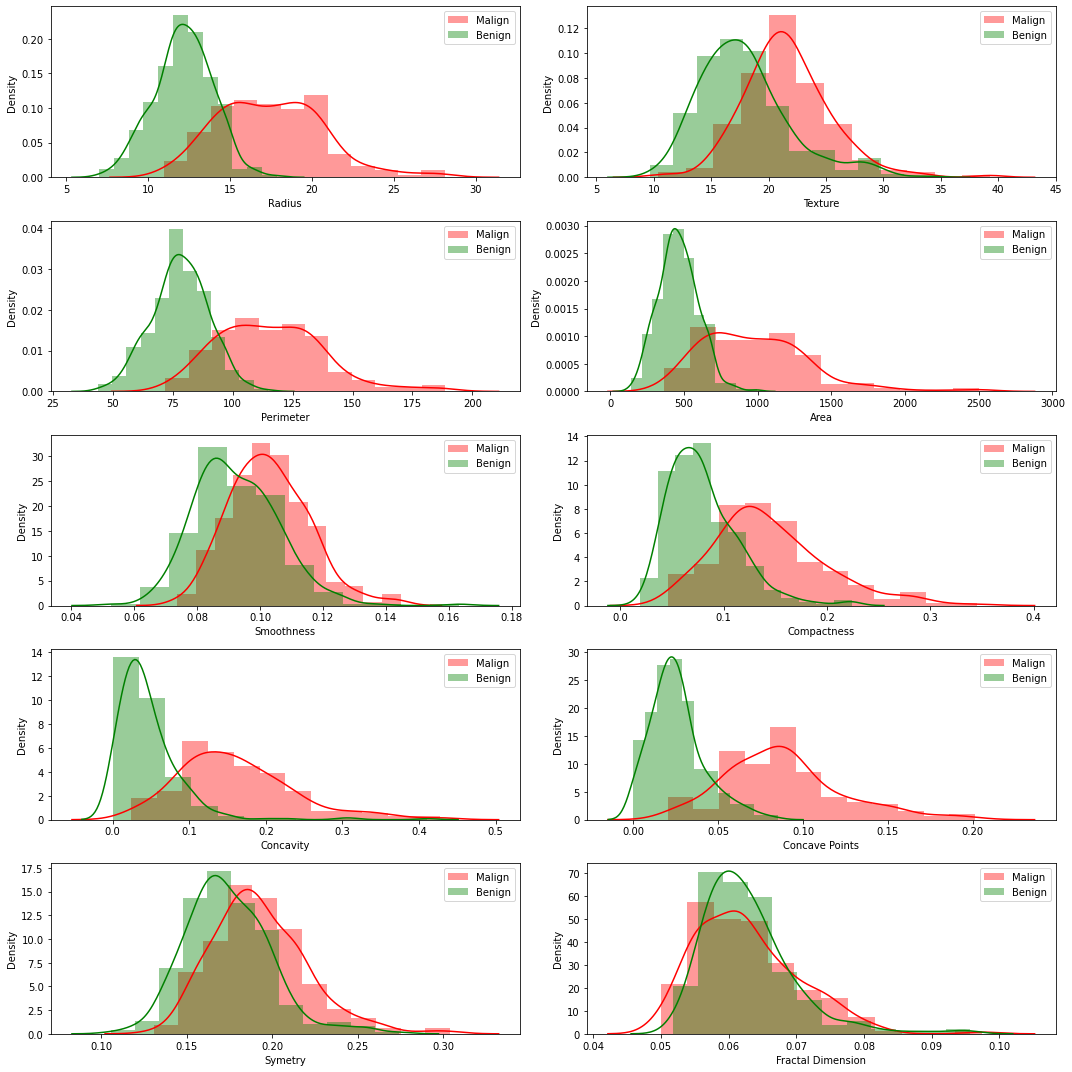

In [40]:
features_list = df_cancer.columns[:10]
bins = 12
plt.figure(figsize=(15,15))
for i in range(len(features_list)): 
  plt.subplot(5, 2, i+1)
  sns.distplot(df_cancer[df_cancer['trueLabel']== 1][features_list[i]], bins=bins, color='red', label='Malign')
  sns.distplot(df_cancer[df_cancer['trueLabel']== 0][features_list[i]], bins=bins, color='green', label='Benign')
  plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Probability type Annotator     Value
0      Sensitivity         1  0.915094
1      Specificity         1  0.949580
2      Sensitivity         2  0.767932
3      Specificity         2  0.909639
4      Sensitivity         3  0.500000
5      Specificity         3  0.739274
6      Sensitivity         4  0.475285
7      Specificity         4  0.715686
8      Sensitivity         5  0.423664
9      Specificity         5  0.671010

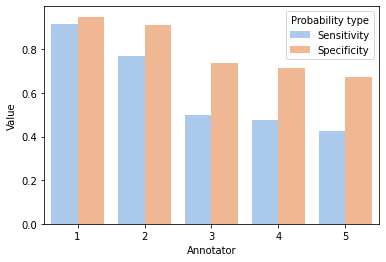

In [41]:
prob_dic = {'Probability type':[], 
             'Annotator':[] ,
             'Value': []}
for i in range(5): 
  prob_dic['Probability type'].append('Sensitivity')
  prob_dic['Annotator'].append(str(i+1))
  prob_dic['Value'].append(np.mean(df_cancer[df_cancer['label'+str(i+1)]==1]['trueLabel']))
  prob_dic['Probability type'].append('Specificity')
  prob_dic['Annotator'].append(str(i+1))
  prob_dic['Value'].append(1-np.mean(df_cancer[df_cancer['label'+str(i+1)]==0]['trueLabel']))
df_prob = pd.DataFrame(prob_dic)
ax = sns.barplot(x="Annotator", y="Value", hue="Probability type", data=df_prob, palette="pastel")
df_prob

## Première approche : *Learning using Majority Label*

In [42]:
df = df_cancer.copy()
df.head(2)

Radius  Texture  Perimeter    Area  ...  label2  label3  label4  label5
0   17.99    10.38      122.8  1001.0  ...     1.0     0.0     0.0     0.0
1   20.57    17.77      132.9  1326.0  ...     0.0     1.0     0.0     0.0

[2 rows x 16 columns]

In [43]:
#Add a column for majority label 
df['MajorityLabel'] = ((df.label1 + df.label2 + df.label3 + df.label4 + df.label5) > 2).astype(float)
#Check 
df[['MajorityLabel', 'label1', 'label2', 'label3', 'label4', 'label5']]

MajorityLabel  label1  label2  label3  label4  label5
0              0.0     1.0     1.0     0.0     0.0     0.0
1              0.0     1.0     0.0     1.0     0.0     0.0
2              1.0     1.0     1.0     1.0     0.0     1.0
3              1.0     1.0     1.0     1.0     1.0     0.0
4              1.0     1.0     1.0     1.0     0.0     0.0
..             ...     ...     ...     ...     ...     ...
564            0.0     1.0     0.0     0.0     0.0     0.0
565            1.0     1.0     1.0     1.0     0.0     0.0
566            1.0     1.0     1.0     0.0     0.0     1.0
567            1.0     0.0     1.0     1.0     1.0     0.0
568            0.0     0.0     1.0     0.0     0.0     0.0

[569 rows x 6 columns]

In [44]:
#Data preprocessing 
X, y = df.drop(['trueLabel', 'label1', 'label2', 'label3', 'label4', 'label5'], axis=1), df[['MajorityLabel', 'trueLabel']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 32)

#Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_maj = y_train['MajorityLabel']
y_train_true = y_train['trueLabel']
y_test = y_test['trueLabel']

Accuracy: 0.9123
Auc: 0.9854
Details:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        70
           1       0.90      0.86      0.88        44

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



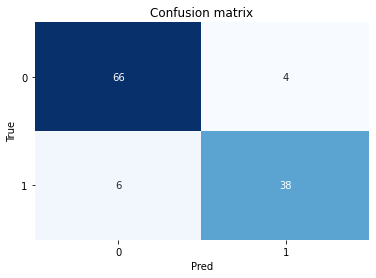

In [45]:
#Train a classifier with majority labels
model_maj = LogisticRegression(max_iter=1000)
model_maj.fit(X_train, y_train_maj)
pred_maj = model_maj.predict(X_test)
pred_prob_maj = model_maj.predict_proba(X_test)
#Print scores
get_classification_scores(y_test, pred_maj, pred_prob_maj[:, 1])
#Plot confusion matrix 
plot_confusion_matrix(y_test, pred_maj)

Accuracy: 0.9737
Auc: 0.9912
Details:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



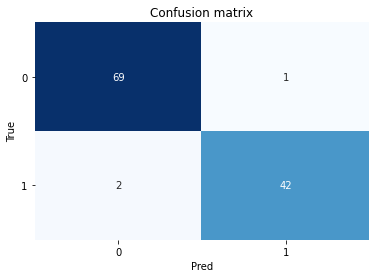

In [46]:
#Train a classifier with true labels
model_true = LogisticRegression(max_iter=1000)
model_true.fit(X_train, y_train_true)
pred_true = model_true.predict(X_test)
pred_prob_true = model_true.predict_proba(X_test)
#Print scores
get_classification_scores(y_test, pred_true, pred_prob_true[:, 1])
#Plot confusion matrix 
plot_confusion_matrix(y_test, pred_true)

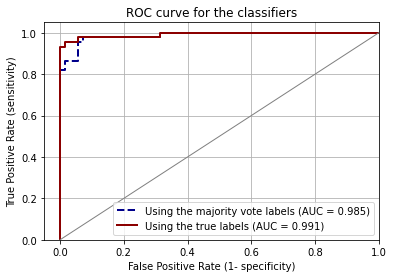

In [47]:
## Plot roc
fig, ax = plt.subplots()
fpr_maj, tpr_maj, thresholds_maj = roc_curve(y_test,  pred_prob_maj[:,1])
fpr_true, tpr_true, thresholds_true = roc_curve(y_test,  pred_prob_true[:,1])
ax.plot(fpr_maj, tpr_maj, color ='darkblue', lw=2, linestyle='--',  label ='Using the majority vote labels (AUC = %0.3f)'%(auc(fpr_maj, tpr_maj)))
ax.plot(fpr_true, tpr_true, color = 'darkred', lw=2, label ='Using the true labels (AUC = %0.3f)'%(auc(fpr_true, tpr_true)))
ax.plot([0,1], [0,1], color='grey', lw=1)
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate (1- specificity)', 
          ylabel="True Positive Rate (sensitivity)", 
          title="ROC curve for the classifiers")
ax.legend(loc=4)
ax.grid(True)

## Seconde approche : *EM algorithm*

In [48]:
#Data preprocessing 
X, y = df.drop(['trueLabel', 'label1', 'label2', 'label3', 'label4', 'label5'], axis=1), \
       df[['MajorityLabel', 'trueLabel', 'label1', 'label2', 'label3', 'label4', 'label5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 32)
#Scale
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_maj = y_train['MajorityLabel']
y_train_true = y_train['trueLabel']
y_train_true = np.array(y_train_true)
y_test = y_test['trueLabel']
y_train_experts = y_train[['label1', 'label2', 'label3', 'label4', 'label5']]
y_train_experts = np.array(y_train_experts)

In [49]:
#Set parameters
n = X_train.shape[0]
d = X_train.shape[1]
R = y_train_experts.shape[1]
n, d, R

(455, 11, 5)

In [50]:
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

def gradient(w, mu, X):
  # w : d 
  # mu : (n)
  # x : (n * d) 
  return np.sum(np.array([(mu[i] - sigmoid(X[i] @ w)) * X[i] for i in range(n)]), axis=0)

def hessian(w, X):
  return  - np.sum(np.array([(sigmoid(X[i] @ w)) * (1 - sigmoid(X[i] @ w)) * X[i][:, None] @ X[i][None, :] for i in range(n)]), axis=0)

In [51]:
class EM_model:

  def __init__(self):
    pass
  
  def init_w(self):
    self.w = 0.01 * np.random.randn(self.X.shape[1])
  
  def init_mu(self):
    self.mu = np.mean(self.y_experts, axis=1)

  def compute_a(self):
    R = self.y_experts.shape[1]
    log_a = np.sum(np.array([self.y_experts[:, j] * np.log(self.alpha[j]) + (1 - self.y_experts)[:, j] * np.log(1 - self.alpha[j]) for j in range(R)]),
                   axis=0)

    return np.exp(log_a)

  def compute_b(self):
    R = self.y_experts.shape[1]
    log_b = np.sum(np.array([(1 - self.y_experts)[:, j] * np.log(self.beta[j]) + self.y_experts[:, j] * np.log(1 - self.beta[j]) for j in range(R)]),
                   axis=0)

    return np.exp(log_b)

  def compute_mu(self):
    p = sigmoid(self.w @ self.X.T)

    a = self.compute_a()
    b = self.compute_b()
  
    self.mu = a * p / (a * p + b * (1 - p))

  def update_alpha(self):
    R = self.y_experts.shape[1]
    S = np.sum(self.mu)

    self.alpha = np.array([np.sum(self.mu * self.y_experts[:, j]) / S for j in range(R)])

  def update_beta(self):
    R = self.y_experts.shape[1]
    S = np.sum(1 - self.mu)

    self.beta = np.array(np.array([np.sum((1 - self.mu) * (1 - self.y_experts)[:, j]) / S for j in range(R)]))

  def update_w(self, lr):

    H = hessian(self.w, self.X)
    g = gradient(self.w, self.mu, self.X)

    H_inv = np.linalg.solve(H, np.eye(H.shape[0]))

    self.w -= lr * H_inv @ g

  def log_likelihood(self):

    a = self.compute_a()
    b = self.compute_b()
    p = sigmoid(self.w @ self.X.T)
    
    ll = np.sum(np.log(a * p + b * (1- p)))
    
    return ll

  def train(self, X, y_experts, n_iters=100, lr=0.1):

    self.X = X
    self.y_experts = y_experts

    self.init_mu()
    self.update_alpha()
    self.update_beta()
    self.init_w()

    ll_history = []

    for iter in tqdm(range(n_iters)):
      #E-step 
      self.compute_mu()
      #M-step
      self.update_alpha()
      self.update_beta()
      self.update_w(lr)
      #Store log_likelihood history
      ll_history.append(self.log_likelihood())

    plt.title('Log Likelihood history')
    plt.plot(ll_history)
    plt.show()

  def roc(self, y_true) :
    fpr, tpr, threshold = roc_curve(y_true, self.mu)
    fpr_moy, tpr_moy, threshold_moy = roc_curve(y_true, np.mean(self.y_experts, axis = 1))

    roc_auc = auc(fpr, tpr)
    roc_auc_moy = auc(fpr_moy, tpr_moy)

    plt.plot(fpr, tpr, lw=2, color = 'darkred',  label='Proposed EM Algorithm  (AUC = %0.3f)'%(roc_auc))
    plt.plot(fpr_moy, tpr_moy, lw = 2, color ='darkblue', linestyle ='--', label="Majority voting baseline (AUC = %0.3f)"%(roc_auc_moy))
    plt.scatter(self.beta, self.alpha,  marker = 'x', linewidth = 2,color = 'black', label = 'Annotators specificity/sensitivity')
    plt.plot([0,1], [0,1], color='grey', lw=1)
    plt.title('ROC curve for the estimated true labels')
    plt.grid()
    plt.legend(loc=4)
    plt.show()

100%|██████████| 500/500 [00:10<00:00, 49.13it/s]


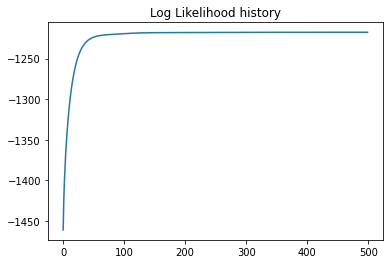

In [52]:
em = EM_model()

em.train(X_train, y_train_experts, 500, 0.1)

Accuracy: 0.9561
Auc: 0.9916
Details:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.93      0.95      0.94        44

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



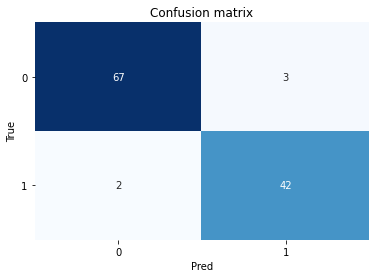

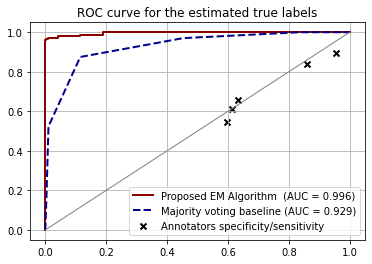

In [53]:
#Predictions
pred_EM = (sigmoid(X_test @ em.w)>0.5)*1 
pred_prob_EM = sigmoid(X_test @ em.w)
#Print scores
get_classification_scores(y_test, pred_EM, pred_prob_EM)
#Plot confusion matrix 
plot_confusion_matrix(y_test, pred_EM)
#ROC curve
em.roc(y_train_true)

In [54]:
train_sens = []
train_spec = []
for i in range(5): 
  train_sens.append(np.mean(y_train[y_train['label'+str(i+1)]==1]['trueLabel']))
  train_spec.append(1-np.mean(df_cancer[df_cancer['label'+str(i+1)]==0]['trueLabel']))
  prob_dic['Value'].append(1-np.mean(df_cancer[df_cancer['label'+str(i+1)]==0]['trueLabel']))
print('Sensitivity:')
print('True value on train set', train_sens)
print('Estimated value on train set', em.alpha)
print('Specificity:')
print('True value on train set',train_spec)
print('Estimated value on train set',em.beta)

Sensitivity:
True value on train set [0.9058823529411765, 0.7647058823529411, 0.4908256880733945, 0.4604651162790698, 0.4230769230769231]
Estimated value on train set [0.89736721 0.8397886  0.65895728 0.60953605 0.54342559]
Specificity:
True value on train set [0.9495798319327731, 0.9096385542168675, 0.7392739273927393, 0.7156862745098039, 0.6710097719869708]
Estimated value on train set [0.95626089 0.85909786 0.6341522  0.61376976 0.59720382]


## Troisième approche : *Bayesian EM algorithm*

In [55]:
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

def bayesian_gradient(w, mu, X, gamma):
  # w : d 
  # mu : (n)
  # x : (n * d) 
  return np.sum(np.array([(mu[i] - sigmoid(X[i] @ w)) * X[i] for i in range(n)]), axis=0) - gamma @ w

def bayesian_hessian(w, X, gamma ):
  return  - np.sum(np.array([(sigmoid(X[i] @ w)) * (1 - sigmoid(X[i] @ w)) * X[i][:, None] @ X[i][None, :] for i in range(n)]), axis=0) - gamma

In [56]:
print("Fraction of good predictions by experts", np.mean((y_train_experts - y_train_true[:, None] == 0), axis=0))

Fraction of good predictions by experts [0.93406593 0.84835165 0.62197802 0.59340659 0.56043956]


In [57]:
class Bayesian_model:

  def __init__(self, mean_prior1, mean_prior2, sigma_prior1, sigma_prior2):
    self.mean_prior1 = mean_prior1
    self.mean_prior2 = mean_prior2

    self.sigma_prior1 = sigma_prior1
    self.sigma_prior2 = sigma_prior2
  
  def init_w(self):
    self.w = np.random.multivariate_normal(np.zeros(self.X.shape[1]), np.linalg.solve(self.gamma_prior, np.eye(self.X.shape[1])))
  
  def init_mu(self):
    self.mu = np.mean(self.y_experts, axis=1)

  def init_priors(self):

    a1 = (- self.mean_prior1 ** 3 + self.mean_prior1 ** 2 - self.mean_prior1 * self.sigma_prior1 ** 2)/(self.sigma_prior1 ** 2)
    a2 = (a1 * (1 - self.mean_prior1))/self.mean_prior1

    self.alpha_priors_1 = a1
    self.alpha_priors_2 = a2

    b1 = (- self.mean_prior2 ** 3 + self.mean_prior2 ** 2 - self.mean_prior2 * self.sigma_prior2 ** 2)/(self.sigma_prior2 ** 2)
    b2 = (b1 * (1 - self.mean_prior2))/self.mean_prior2

    self.beta_priors_1 = b1
    self.beta_priors_2 = b2  


    self.gamma_prior = np.random.random((self.X.shape[1], self.X.shape[1]))

  def compute_a(self):
    R = self.y_experts.shape[1]
    log_a = np.sum(np.array([self.y_experts[:, j] * np.log(self.alpha[j]) + (1 - self.y_experts)[:, j] * np.log(1 - self.alpha[j]) for j in range(R)]),
                   axis=0)

    return np.exp(log_a)

  def compute_b(self):
    R = self.y_experts.shape[1]
    log_b = np.sum(np.array([(1 - self.y_experts)[:, j] * np.log(self.beta[j]) + self.y_experts[:, j] * np.log(1 - self.beta[j]) for j in range(R)]),
                   axis=0)

    return np.exp(log_b)

  def compute_mu(self):
    p = sigmoid(self.w @ self.X.T)

    a = self.compute_a()
    b = self.compute_b()
  
    self.mu = a * p / (a * p + b * (1 - p))

  def update_alpha(self):
    S = np.sum(self.mu)
    sum = np.array([np.sum(self.mu * self.y_experts[:, j]) for j in range(self.y_experts.shape[1])])

    self.alpha = (self.alpha_priors_1 - 1 + sum) / (self.alpha_priors_1 + self.alpha_priors_2 - 2 + S)

  def update_beta(self):
    sum = np.array([np.sum((1 - self.mu) * (1 - self.y_experts)[:, j]) for j in range(R)])
    S = np.sum(1 - self.mu)

    self.beta = (self.beta_priors_1 - 1 + sum) / (self.beta_priors_1 + self.beta_priors_2 - 2 + S)

  def update_w(self, lr):

    H = bayesian_hessian(self.w, self.X, self.gamma_prior)
    g = bayesian_gradient(self.w, self.mu, self.X, self.gamma_prior)

    H_inv = np.linalg.solve(H, np.eye(H.shape[0]))

    self.w -= lr * H_inv @ g

  def log_likelihood(self):

    a = self.compute_a()
    b = self.compute_b()
    p = sigmoid(self.w @ self.X.T)
    
    ll = np.sum(np.log(a * p + b * (1-  p)))
    
    return ll

  def train(self, X, y_experts, n_iters=100, lr=0.1):

    self.X = X
    self.y_experts = y_experts

    self.init_mu()
    self.init_priors()

    self.update_alpha()
    self.update_beta()

    self.init_w()

    ll_history = []

    for iter in tqdm(range(n_iters)):
      self.compute_mu()

      self.update_alpha()
      self.update_beta()
      self.update_w(lr)

      ll_history.append(self.log_likelihood())

    plt.title('Log Likelihood history')
    plt.plot(ll_history)
    plt.show()
  
  def roc(self, y_true) :
    fpr, tpr, threshold = roc_curve(y_true, self.mu)
    fpr_moy, tpr_moy, threshold_moy = roc_curve(y_true, np.mean(self.y_experts, axis = 1))

    roc_auc = auc(fpr, tpr)
    roc_auc_moy = auc(fpr_moy, tpr_moy)

    plt.plot(fpr, tpr, lw=2, color = 'darkred',  label='Proposed EM Algorithm  (AUC = %0.3f)'%(roc_auc))
    plt.plot(fpr_moy, tpr_moy, lw = 2, color ='darkblue', linestyle ='--', label="Majority voting baseline (AUC = %0.3f)"%(roc_auc_moy))
    plt.scatter(self.beta, self.alpha,  marker = 'x', linewidth = 2,color = 'black', label = 'Annotators specificity/sensitivity')
    plt.plot([0,1], [0,1], color='grey', lw=1)
    plt.title('ROC curve for the estimated true labels')
    plt.grid()
    plt.legend(loc=4)
    plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 500/500 [00:10<00:00, 48.14it/s]


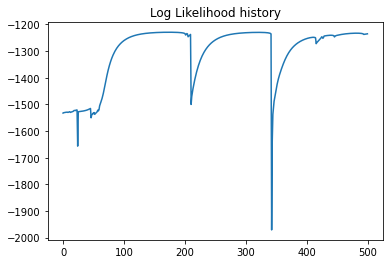

In [58]:
mean_prior1 = np.random.rand(y_train_experts.shape[1])
mean_prior2 = np.random.rand(y_train_experts.shape[1])

sigma_prior1 = np.ones(y_train_experts.shape[1])
sigma_prior2 = np.ones(y_train_experts.shape[1])

bay = Bayesian_model(mean_prior1, mean_prior2, sigma_prior1, sigma_prior2)

bay.train(X_train, y_train_experts, 500, lr=0.05)

Accuracy: 0.9386
Auc: 0.9825
Details:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.91      0.93      0.92        44

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



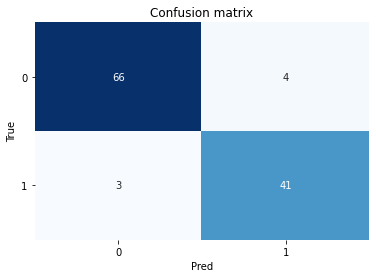

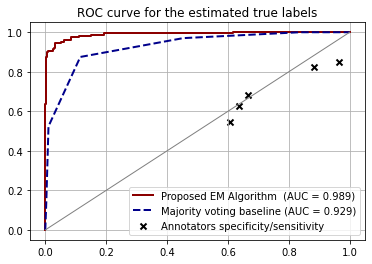

In [59]:
#Predictions
pred_BAY = (sigmoid(X_test @ bay.w)>0.5)*1
pred_prob_BAY = sigmoid(X_test @ bay.w)
#Print scores
get_classification_scores(y_test, pred_BAY, pred_prob_BAY)
#Plot confusion matrix 
plot_confusion_matrix(y_test, pred_BAY)
#ROC curve
bay.roc(y_train_true)

In [60]:
print('Sensitivity:')
print('True value on train set', train_sens)
print('Estimated value on train set', bay.alpha)
print('Specificity:')
print('True value on train set',train_spec)
print('Estimated value on train set',bay.beta)

Sensitivity:
True value on train set [0.9058823529411765, 0.7647058823529411, 0.4908256880733945, 0.4604651162790698, 0.4230769230769231]
Estimated value on train set [0.8475738  0.82661528 0.68313761 0.62668031 0.54569657]
Specificity:
True value on train set [0.9495798319327731, 0.9096385542168675, 0.7392739273927393, 0.7156862745098039, 0.6710097719869708]
Estimated value on train set [0.9644587  0.88264721 0.66705413 0.63754326 0.60549356]


# Problème de régression

## Génération des données 

In [ ]:
N = 500
precision_list = [0.01, 0.1, 1]
R = len(precision_list)
df = pd.DataFrame()
df['Intercept'] = np.repeat(1,N)
df['x'] = np.random.rand(N)
df['trueval'] = -2*df['Intercept'] + 5*df['x']
for i in range(R): 
  val_name = 'val'+str(i+1)
  df[val_name] = np.random.normal(loc= df['trueval'], scale = precision_list[i]**-0.5)
df.head()

Intercept         x   trueval       val1      val2      val3
0          1  0.063100 -1.684500  30.966540  2.931996 -2.264013
1          1  0.594465  0.972323   3.488197  1.595371 -1.137605
2          1  0.196296 -1.018518  12.220248 -1.251083 -0.616068
3          1  0.637494  1.187470  15.282173  3.627477  1.869965
4          1  0.865584  2.327922  -1.072154  4.648657  2.055267

In [ ]:
#Data preprocessing 
X, y = df.drop(['trueval', 'val1', 'val2', 'val3'], axis=1), \
       df[['trueval', 'val1', 'val2', 'val3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_true = y_train['trueval']
y_train_true = np.array(y_train_true)
y_test = y_test['trueval']
y_train_experts = y_train[['val1', 'val2', 'val3']]
y_train_experts = np.array(y_train_experts)

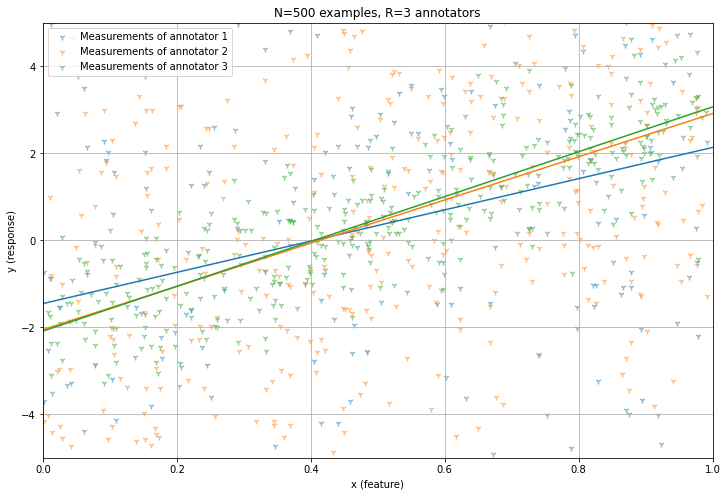

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range(R): 
  #Plot points
  ax.scatter(X_train.x,y_train_experts[:,i] , marker ='1', alpha = 0.5, label = 'Measurements of annotator ' +str(i+1))
  #Plot linear regression
  lr = LinearRegression(fit_intercept=False)
  lr.fit(X_train, y_train_experts[:,i])
  ax.plot([0,1], [lr.coef_[0],lr.coef_[0] + lr.coef_[1]])
ax.legend(loc=2)
ax.grid()
ax.set_xlabel('x (feature)')
ax.set_ylabel('y (response)')
ax.set_title('N=%0.0f examples, R=%0.0f annotators'%(N,R))
ax.set(xlim=(0, 1), ylim=(-5, 5))
fig.show()

## Régressions linéaires naives

In [ ]:
df_results = pd.DataFrame()

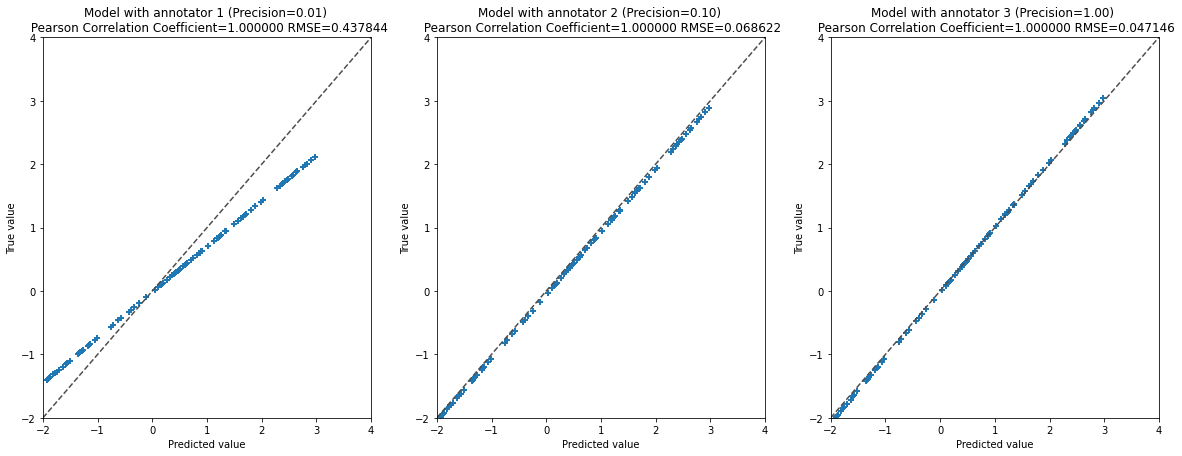

In [ ]:
fig, ax = plt.subplots(1,R, figsize=(20,7))
for i in range(R): 
  lr = LinearRegression(fit_intercept=False)
  val_name = 'val'+str(i+1)
  lr.fit(X_train, y_train_experts[:,i])
  y_pred = lr.predict(X_test)
  ax[i].scatter(y_test,y_pred, marker = '+', lw=2 )
  ax[i].plot([-2, 4], [-2, 4], ls="--", c=".3")
  ax[i].set(xlim=(-2, 4), ylim=(-2, 4))
  ax[i].set_xlabel('Predicted value')
  ax[i].set_ylabel('True value')
  rmse = mean_squared_error(y_test, y_pred)**0.5
  corr = pearsonr(y_test,y_pred)[0]
  df_results['Model with annotator ' + str(i+1)] = [lr.coef_[0], lr.coef_[1], rmse]
  ax[i].set_title('Model with annotator %0.0f (Precision=%0.2f) \n Pearson Correlation Coefficient=%0.6f RMSE=%0.6f'%(i+1,precision_list[i],corr,rmse))
plt.show()

In [ ]:
df_results.index = ['Intercept', 'Feature coef.', 'RMSE']
df_results

Model with annotator 1  ...  Model with annotator 3
Intercept                   -1.453633  ...               -2.087263
Feature coef.                3.590821  ...                5.156535
RMSE                         0.437844  ...                0.047146

[3 rows x 3 columns]

## Modèle proposé par l'article et comparaisons

In [ ]:
class Reg : 

  def __init__(self):
    pass
  
  def init_w(self):
    self.w = 0.01 * np.random.randn(self.X.shape[1])
  
  def update_lbda(self): 
    R = self.y_experts.shape[1]
    inv_lbda = np.mean(np.array([(self.y_experts[:,j] - self.X @ self.w)**2 for j in range(R)]), axis=1)
    self.lbda =  1/inv_lbda

  def update_w(self): 
    
    R = self.y_experts.shape[1]
    H = self.X.T @ self.X
    inv_H = np.linalg.solve(H, np.eye(H.shape[0]))
    y_hat = np.sum(np.array([self.lbda[j]*self.y_experts[:,j] for j in range(R)]), axis=0)
    self.w = inv_H @ self.X.T @ y_hat /np.sum(self.lbda) 

  def log_likelihood(self):
      R = self.y_experts.shape[1]
      ll = np.sum(np.array([norm.logpdf(self.y_experts[:,j], loc= self.X @ self.w, scale = (1/self.lbda[j])**0.5) for j in range(R)]))
      return ll

  def train(self, X, y_experts, n_iters=100):

    self.X = X
    self.y_experts = y_experts

    self.init_w()

    ll_history = []

    for iter in tqdm(range(n_iters)):
      self.update_lbda()
      self.update_w()
      #Store log_likelihood history
      ll_history.append(self.log_likelihood())

    plt.title('Log Likelihood history')
    plt.plot(ll_history)
    plt.show()

100%|██████████| 500/500 [00:00<00:00, 848.40it/s]


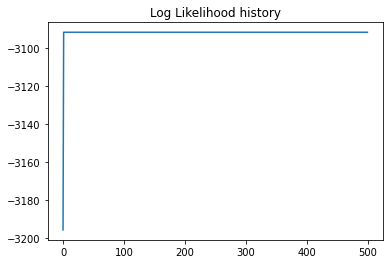

In [ ]:
reg = Reg()
reg.train(np.array(X_train), y_train_experts, n_iters = 500)

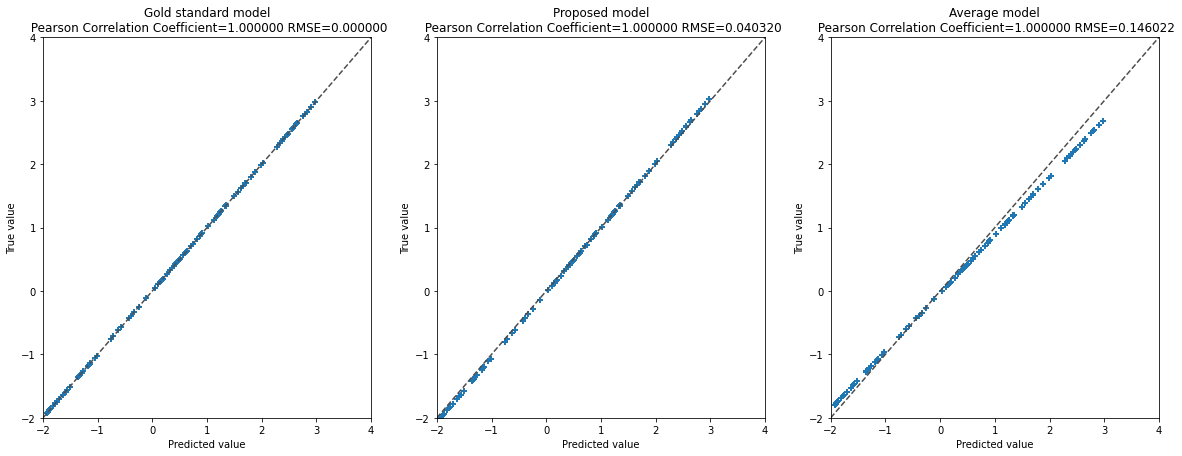

In [ ]:
fig, ax = plt.subplots(1,R, figsize=(20,7))

#Gold standard model
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train_true)
y_pred = lr.predict(X_test)
ax[0].scatter(y_test,y_pred, marker = '+', lw=2 )
ax[0].plot([-2, 4], [-2, 4], ls="--", c=".3")
ax[0].set(xlim=(-2, 4), ylim=(-2, 4))
ax[0].set_xlabel('Predicted value')
ax[0].set_ylabel('True value')
rmse = mean_squared_error(y_test, y_pred)**0.5
corr = pearsonr(y_test,y_pred)[0]
df_results['Gold standard model'] = [lr.coef_[0], lr.coef_[1], rmse]
ax[0].set_title('Gold standard model\n Pearson Correlation Coefficient=%0.6f RMSE=%0.6f'%(corr,rmse))

#Proposed model 
y_pred = X_test @ reg.w
ax[1].scatter(y_test,y_pred, marker = '+', lw=2 )
ax[1].plot([-2, 4], [-2, 4], ls="--", c=".3")
ax[1].set(xlim=(-2, 4), ylim=(-2, 4))
ax[1].set_xlabel('Predicted value')
ax[1].set_ylabel('True value')
rmse = mean_squared_error(y_test, y_pred)**0.5
corr = pearsonr(y_test,y_pred)[0]
df_results['Proposed model'] = [lr.coef_[0], lr.coef_[1], rmse]
ax[1].set_title('Proposed model\n Pearson Correlation Coefficient=%0.6f RMSE=%0.6f'%(corr,rmse))

#Average model
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, np.mean(y_train_experts, axis=1))
y_pred = lr.predict(X_test)
ax[2].scatter(y_test,y_pred, marker = '+', lw=2 )
ax[2].plot([-2, 4], [-2, 4], ls="--", c=".3")
ax[2].set(xlim=(-2, 4), ylim=(-2, 4))
ax[2].set_xlabel('Predicted value')
ax[2].set_ylabel('True value')
rmse = mean_squared_error(y_test, y_pred)**0.5
corr = pearsonr(y_test,y_pred)[0]
df_results['Average model'] = [lr.coef_[0], lr.coef_[1], rmse]
ax[2].set_title('Average model\n Pearson Correlation Coefficient=%0.6f RMSE=%0.6f'%(corr,rmse))

plt.show()

In [ ]:
df_results
df_results.T.sort_values(by='RMSE')

Intercept  Feature coef.          RMSE
Gold standard model     -2.000000       5.000000  1.912035e-15
Proposed model          -2.000000       5.000000  4.031967e-02
Model with annotator 3  -2.087263       5.156535  4.714587e-02
Model with annotator 2  -2.051475       4.966441  6.862178e-02
Average model           -1.864124       4.571265  1.460219e-01
Model with annotator 1  -1.453633       3.590821  4.378444e-01

In [ ]:
idx = []
for i in range(R): 
   idx.append("Annotator " + str(i+1) )
df_precision = pd.DataFrame(reg.lbda, index =idx, columns = ["Precision estimate"])
df_precision["True precision"] = precision_list
df_precision

Precision estimate  True precision
Annotator 1            0.010079            0.01
Annotator 2            0.098834            0.10
Annotator 3            0.966766            1.00